Vamos transformar os dados de setores censitários e transformá-los em bairros.

In [ ]:
!pip install --upgrade fiona
!pip install --upgrade pyproj
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade pandas
!pip install --upgrade geopandas

In [6]:
import geopandas as gpd
import pandas as pd

## Preparação dos dados

In [7]:
# leitura dos arquivos

dir = '/content/drive/MyDrive/Programacao/GeoPandas/Dados/Dados_Modificados/'

setores = gpd.read_file(dir + 'Setor_censitario/Dados_censo.shp')

Para efetuar a agregação com o dissolve, devemos alterar o CRS para uma projeção global, no momento estamos usando um CRS com projeção regional.

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


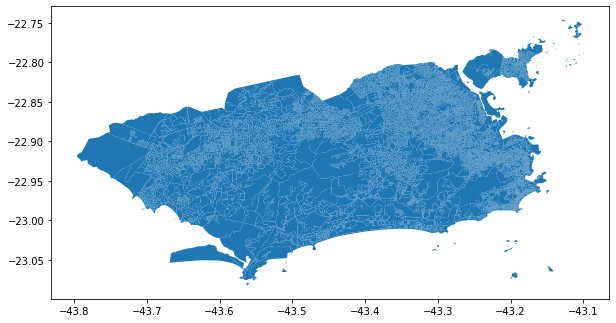

In [8]:
setores.to_crs({'init':'epsg:4326'}, inplace=True)

setores.plot(figsize=(10,10))

## Seleção dos dados

Utilizando a feature NM_BAIRRO, vamos agrupar os setores em seus bairros:

In [9]:
setores.head(1)

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,Cod_setor,Cod_Grande,Nome_Grand,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_me,Cod_micro,Nome_da_mi,Cod_RM,Nome_da_RM,Cod_munici,Nome_do_mu,Cod_distri,Nome_do_di,Cod_subdis,Nome_do_su,Cod_bairro,Nome_do_ba,Situacao_s,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,400678,330455705080070,URBANO,330455705006,Rio Comprido,330455705,RIO DE JANEIRO,330455705,RIO COMPRIDO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,330455705080070,3.0,Região Sudeste,RJ,Rio de Janeiro,3306.0,Metropolitana do Rio de Janeiro,33018.0,Rio de Janeiro,19.0,RM Rio de Janeiro,3304557.0,RIO DE JANEIRO,330455705.0,RIO DE JANEIRO,3.304557e+10,RIO COMPRIDO,3.304557e+09,Rio Comprido,1.0,0.0,169.0,491.0,2.91,2.06,3149.14,7515356.37,3206.05,7468430.45,1970.58,5332244.66,2501.34,5441140.47,"POLYGON ((-43.21461 -22.92207, -43.21475 -22.9..."


In [12]:
setor_m = setores[['NM_BAIRRO', 'geometry', 'V002']] # V002: População do setor sensitário

bairro = setor_m.dissolve(by='NM_BAIRRO', aggfunc='sum') # Agrega pelo nome do bairro e soma as populações

bairro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs', inplace=True)

bairro.reset_index(inplace=True)

bairro

,NM_BAIRRO,geometry,V002
0,Abolição,"POLYGON ((674.902 7467.737, 674.936 7467.767, ...",11356.0
1,Acari,"POLYGON ((670.474 7474.718, 670.405 7474.689, ...",26967.0
2,Alto da Boa Vista,"POLYGON ((674.901 7457.693, 674.898 7457.693, ...",9189.0
3,Anchieta,"POLYGON ((663.045 7474.050, 663.041 7474.046, ...",55634.0
4,Andaraí,"POLYGON ((679.002 7462.700, 679.002 7462.700, ...",39325.0
...,...,...,...
155,Vila Valqueire,"POLYGON ((667.473 7466.993, 667.477 7466.985, ...",32232.0
156,Vila da Penha,"POLYGON ((673.691 7472.193, 673.672 7472.177, ...",25462.0
157,Vista Alegre,"POLYGON ((673.524 7473.970, 673.517 7473.968, ...",8622.0
158,Zumbi,"POLYGON ((687.240 7474.829, 687.239 7474.833, ...",2016.0


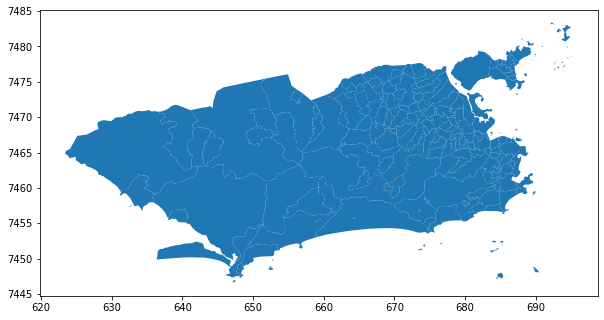

In [11]:
bairro.plot(figsize=(10,10))

In [13]:
import os

dir = '/content/drive/MyDrive/Programacao/GeoPandas/Dados/Dados_Modificados/Bairros/'

if not os.path.exists(dir):
    os.makedirs(dir)

bairro.to_file(dir + 'Bairros.shp')